In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median, StatisticsError
from pathlib import Path 

In [47]:
table = pd.read_excel('03.23.xlsx')
pathlist = Path('ReportDir').glob('*.xlsx')
for file in pathlist:
    table = pd.concat([table, pd.read_excel(file)])
    print(table.head(), file)
    

   № Переход_по_ссылке Ввод_данных Сообщение_в_ЦПКБ  \
0  1              есть        есть              нет   
1  2               нет         нет               да   
2  3               нет         нет              нет   
3  4               нет         нет              нет   
4  5               нет         нет              нет   

                          Должность     Подразделение_2      Подразделение_3  \
0  Ведущий инженер по сопровождению  ПАО Сбербанк (ЦА)    Блок "Технологии"    
1          Руководитель направления  ПАО Сбербанк (ЦА)    Блок "Технологии"    
2          Руководитель направления  ПАО Сбербанк (ЦА)         Блок "Риски"    
3           Исполнительный директор  ПАО Сбербанк (ЦА)    Блок "Технологии"    
4           Исполнительный директор  ПАО Сбербанк (ЦА)    Блок "Технологии"    

   Подразделение_4  
0              1.0  
1              1.0  
2              2.0  
3              3.0  
4              4.0   ReportDir\05.22.xlsx
   № Переход_по_ссылке Ввод_данных Сообще

# Общая оценка

Размеры датасета

In [48]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,есть,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,нет,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [49]:
print(table.shape)
print(len(table))

(243330, 8)
243330


Уникальные значения в столбцах

In [56]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table['Ввод_данных'] = table['Ввод_данных'].fillna('нет')
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].fillna('нет')
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,есть,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,нет,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [57]:
table['Переход_по_ссылке'].unique()

array(['есть', 'нет', 'нет перехода по ссылке', 'есть переход по ссылке',
       'Осуществлён', 'Совершён'], dtype=object)

In [58]:
table['Ввод_данных'].unique()

array(['есть', 'нет', 'нет ввода данных', 'есть ввод данных', 'Введены'],
      dtype=object)

In [59]:
table['Сообщение_в_ЦПКБ'].unique()

array(['нет', 'да', 'есть', 'Поступило', 'Сообщил'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [60]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] in ['есть', 'да'] else 0

In [61]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,1,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,0,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,0,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


Проверяем результат

In [62]:
table['Ввод_данных'].unique()

array([1, 0], dtype=int64)

In [63]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [64]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [65]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [66]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,1,1,0,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),Блок Технологии,1.0
1,2,0,0,1,Руководитель направления,ПАО Сбербанк (ЦА),Блок Технологии,1.0
2,3,0,0,0,Руководитель направления,ПАО Сбербанк (ЦА),Блок Риски,2.0
3,4,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,3.0
4,5,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,4.0


Подсчет сотрудников

In [67]:
table.value_counts('Должность')

Должность
Руководитель направления                                48472
Главный инженер по разработке                           34019
Ведущий инженер по разработке                           16346
Эксперт                                                 15585
Менеджер                                                13483
                                                        ...  
Дизайнер интерфейсов                                        1
Бизнес-партнер по кибербезопасности экосистемы              1
Главный специалист по охране окружающей среды               1
Руководитель направления аудита по кибербезопасности        1
Младший инженер                                             1
Length: 464, dtype: int64

In [68]:
len(table.value_counts('Должность'))

464

Подсчет блоков

In [69]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     154344
Блок Корпоративно-инвестиционный     21515
Блок Сервисы                         11426
Блок Розничный                       11191
Подразделения вне                     8227
Блок Управление                       6936
Блок HR                               5245
Блок Финансы                          5080
Блок Риски                            4946
Блок Сеть                             4269
Блок GR,                              3684
Другие подразделения                  3492
Блок Стратегия                         796
Прямое подчинение                      679
Блок Развитие                          571
Блок Транзакционный                    551
Блок Sberbank                          377
Старая структура                         1
dtype: int64

In [70]:
len(table.value_counts('Подразделение_3'))

18

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [71]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [72]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [73]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [74]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

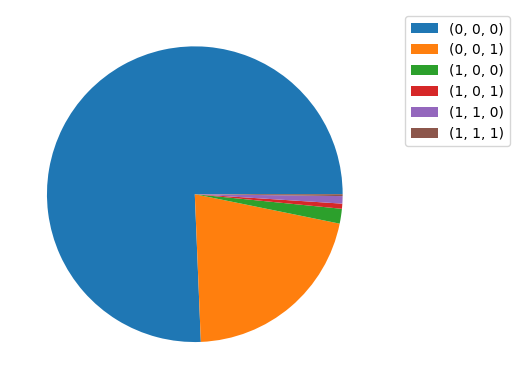

In [75]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [76]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            48472
Главный инженер по разработке       34019
Ведущий инженер по разработке       16346
Эксперт                             15585
Менеджер                            13483
Исполнительный директор             12762
Старший инженер по разработке        9080
Руководитель проектов                7031
Ведущий инженер по сопровождению     5396
Ведущий инженер                      5112
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [77]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

68.749

Топ 10 должностей в каждом варианте

In [78]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления            35392
Главный инженер по разработке       24036
Эксперт                             12965
Ведущий инженер по разработке       11704
Менеджер                            10508
Исполнительный директор              9476
Старший инженер по разработке        6347
Руководитель проектов                5474
Ведущий инженер по сопровождению     4211
Ведущий инженер                      4093
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления            11444
Главный инженер по разработке        9014
Ведущий инженер по разработке        4235
Исполнительный директор              2733
Старший инженер по разработке        2492
Менеджер                             2437
Эксперт                              2094
Руководитель проектов                1277
Ведущий инженер по сопровождению     1073
Инженер по разработке                 949
dtype: int64


(1, 0, 0): 
Должность
Руководитель направления         838
Главный инженер по разработ

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


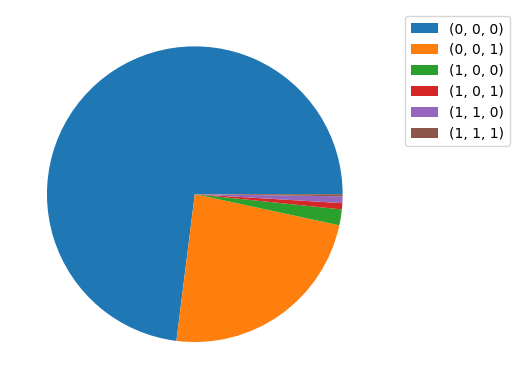

Главный инженер по разработке


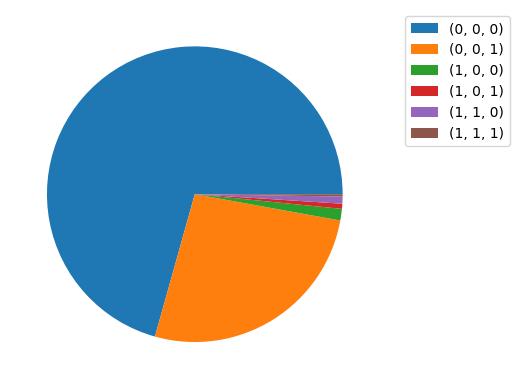

Ведущий инженер по разработке


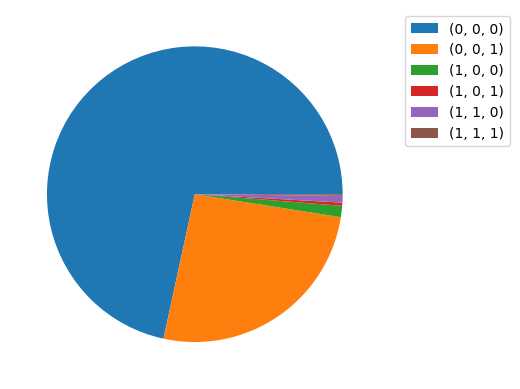

Эксперт


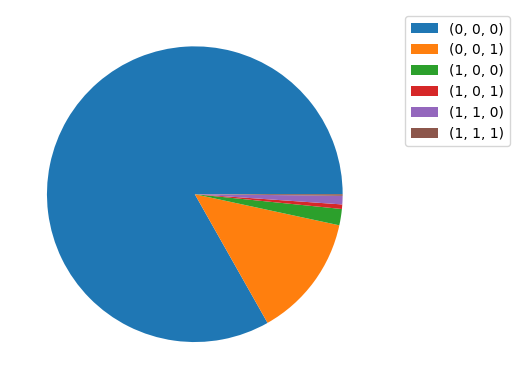

Менеджер


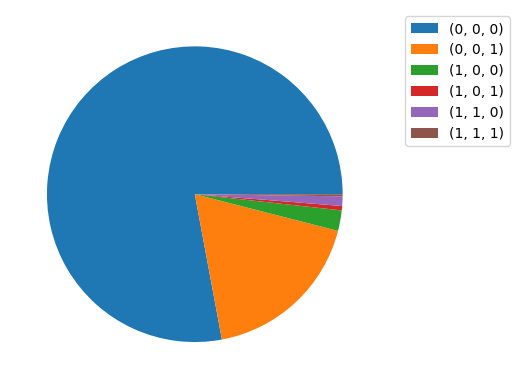

Исполнительный директор


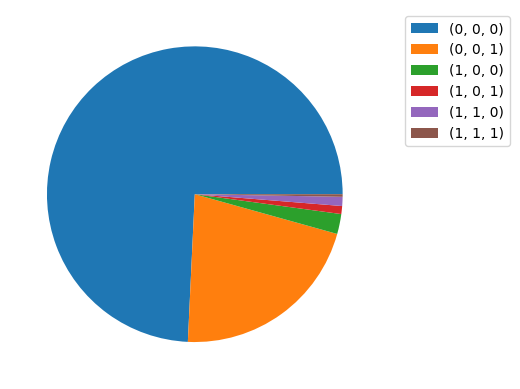

Старший инженер по разработке


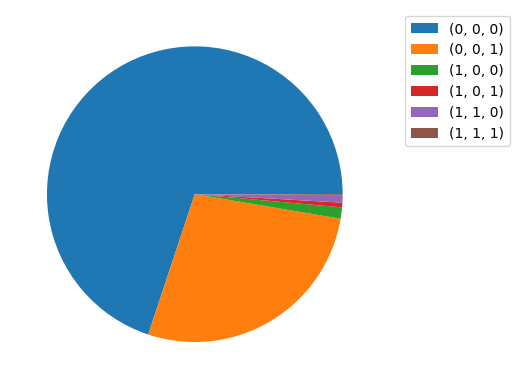

Руководитель проектов


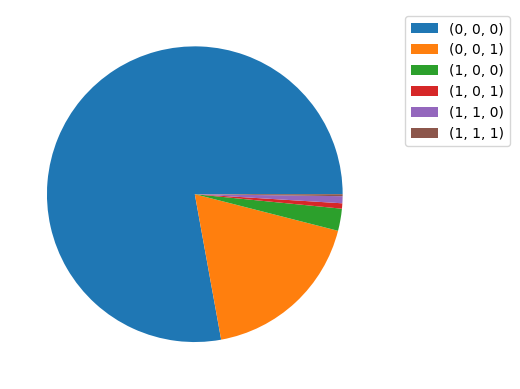

Ведущий инженер по сопровождению


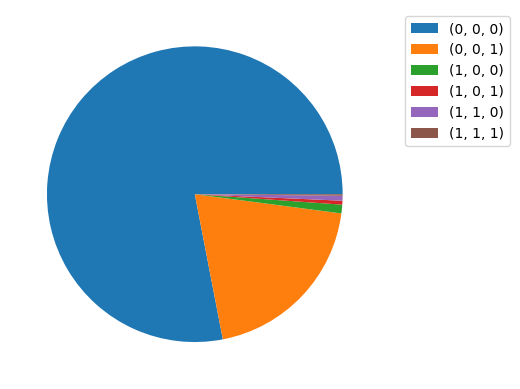

Ведущий инженер


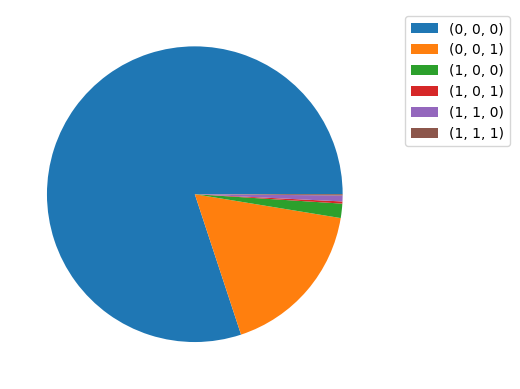

In [79]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [80]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     154344
Блок Корпоративно-инвестиционный     21515
Блок Сервисы                         11426
Блок Розничный                       11191
Подразделения вне                     8227
Блок Управление                       6936
Блок HR                               5245
Блок Финансы                          5080
Блок Риски                            4946
Блок Сеть                             4269
dtype: int64

Топ 10 блоков в каждом варианте

In [81]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     113307
Блок Корпоративно-инвестиционный     17589
Блок Розничный                        9029
Блок Сервисы                          8215
Подразделения вне                     6768
Блок Управление                       6059
Блок HR                               4220
Блок Финансы                          4108
Блок Сеть                             3398
Блок Риски                            3196
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     36722
Блок Корпоративно-инвестиционный     3015
Блок Сервисы                         2794
Блок Розничный                       1705
Блок Риски                           1625
Подразделения вне                    1117
Блок HR                               786
Блок Финансы                          778
Блок Сеть                             676
Блок Управление                       640
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


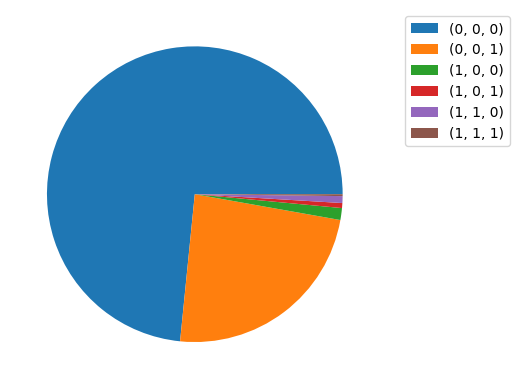

Блок Корпоративно-инвестиционный


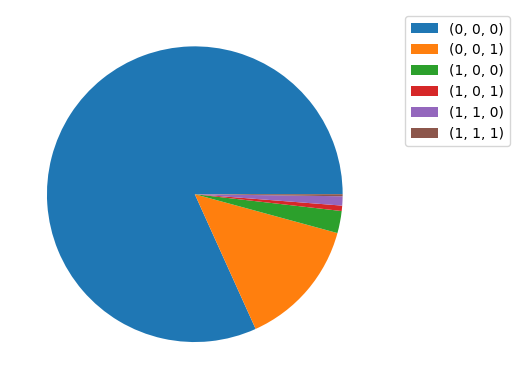

Блок Сервисы


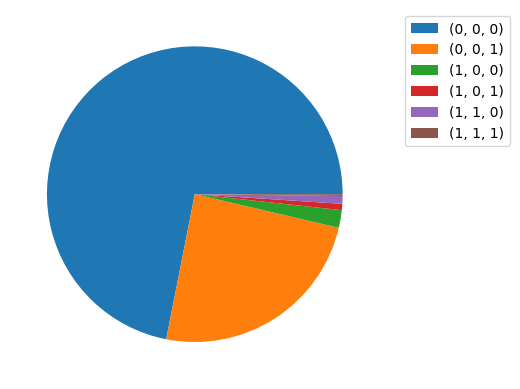

Блок Розничный


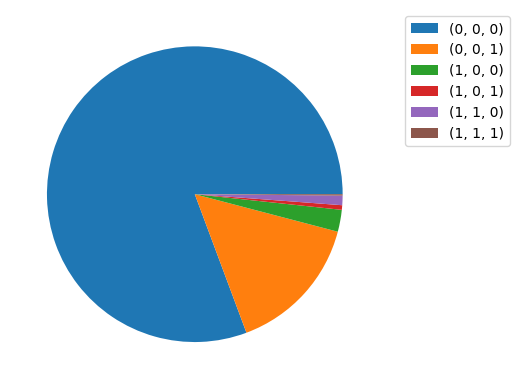

Подразделения вне


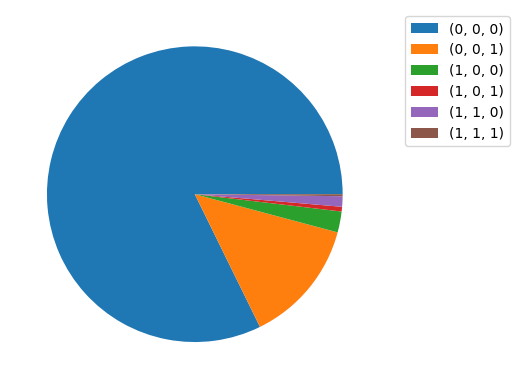

Блок Управление


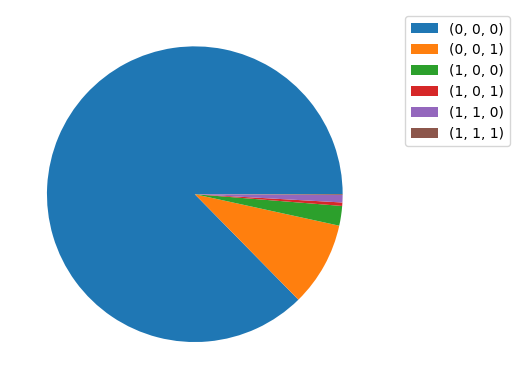

Блок HR


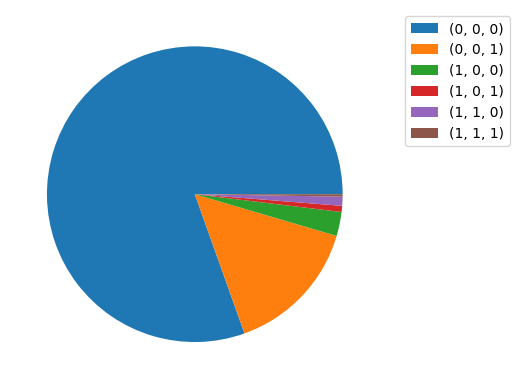

Блок Финансы


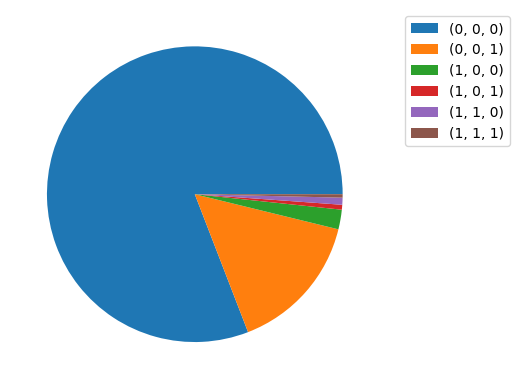

Блок Риски


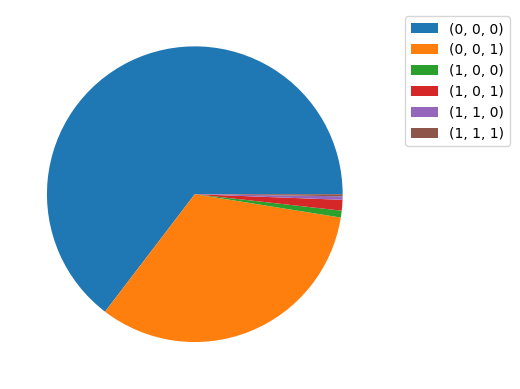

Блок Сеть


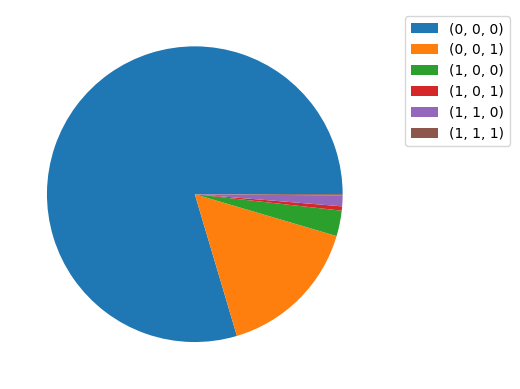

In [82]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [83]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [84]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [85]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [86]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",75.652406,24.347594
"(0, 0, 1)","(0, 0, 1)",21.156043,78.843957
"(1, 0, 0)","(1, 0, 0)",1.615502,98.384498
"(1, 0, 1)","(1, 0, 1)",0.558501,99.441499
"(1, 1, 0)","(1, 1, 0)",0.813299,99.186701
"(1, 1, 1)","(1, 1, 1)",0.204249,99.795751


Соотношение объема каждого исхода к общему объему на графике

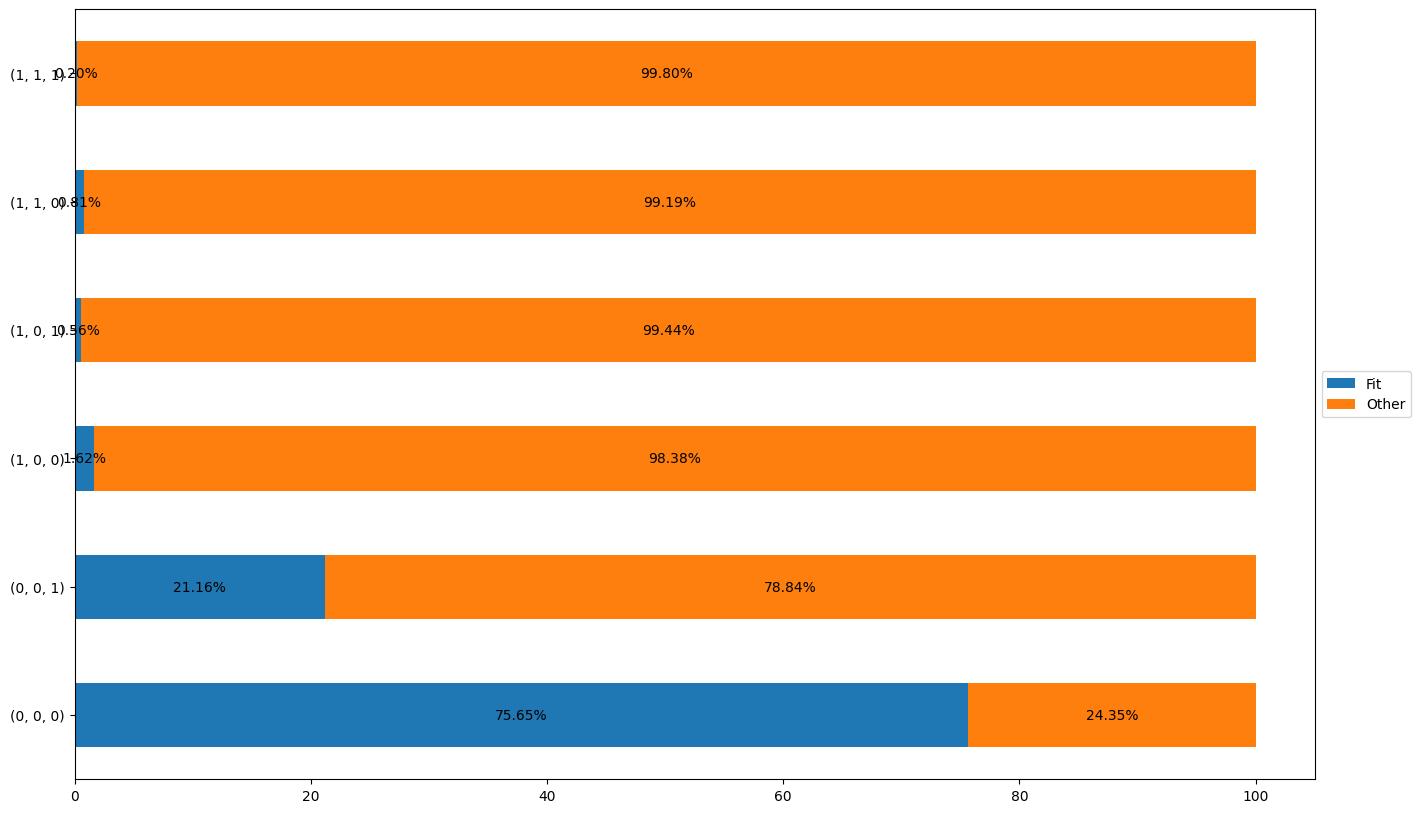

In [87]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [88]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [89]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [90]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43076,Инженер по разработке,Блок Технологии,"(0, 0, 0)"
43077,Аналитик,Подразделения вне,"(0, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [91]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [92]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [93]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


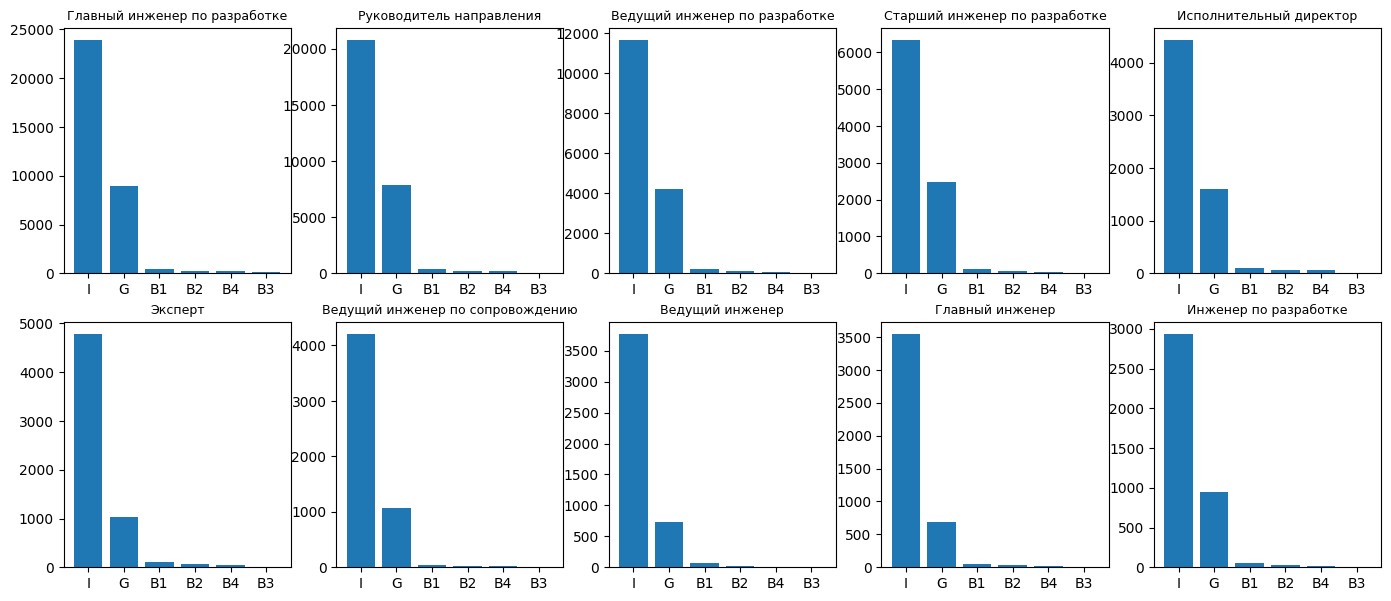

Блок Риски


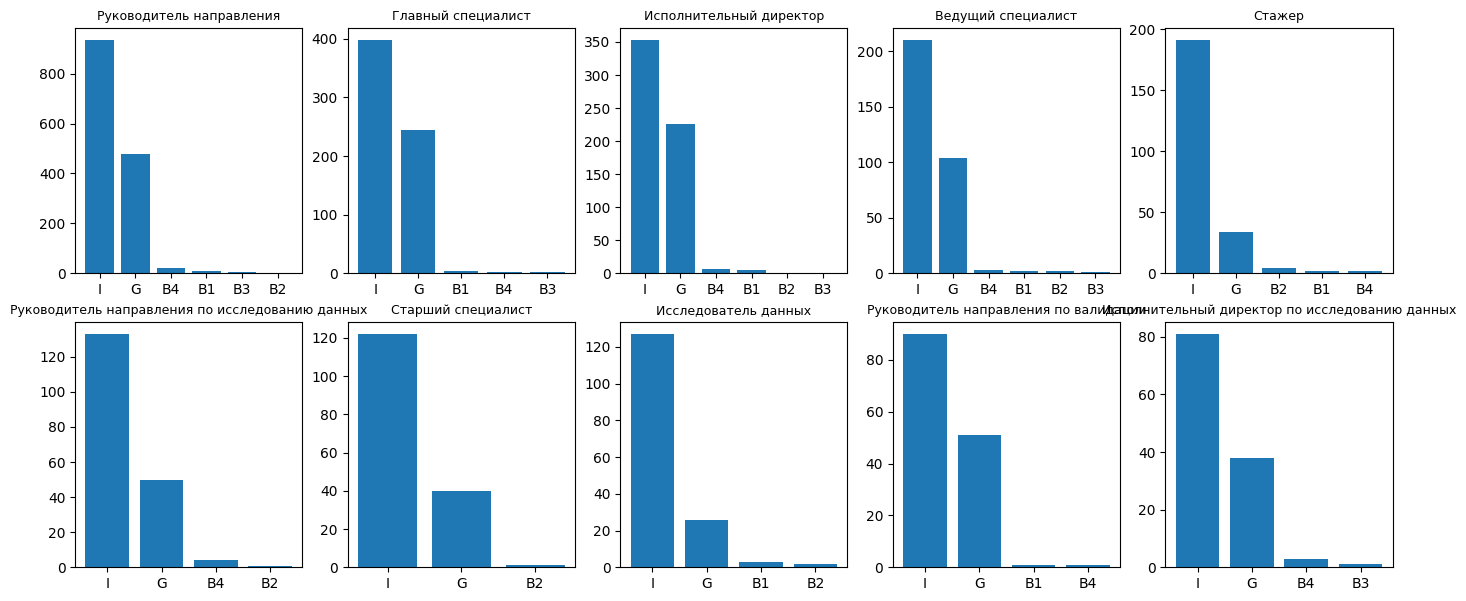

Прямое подчинение


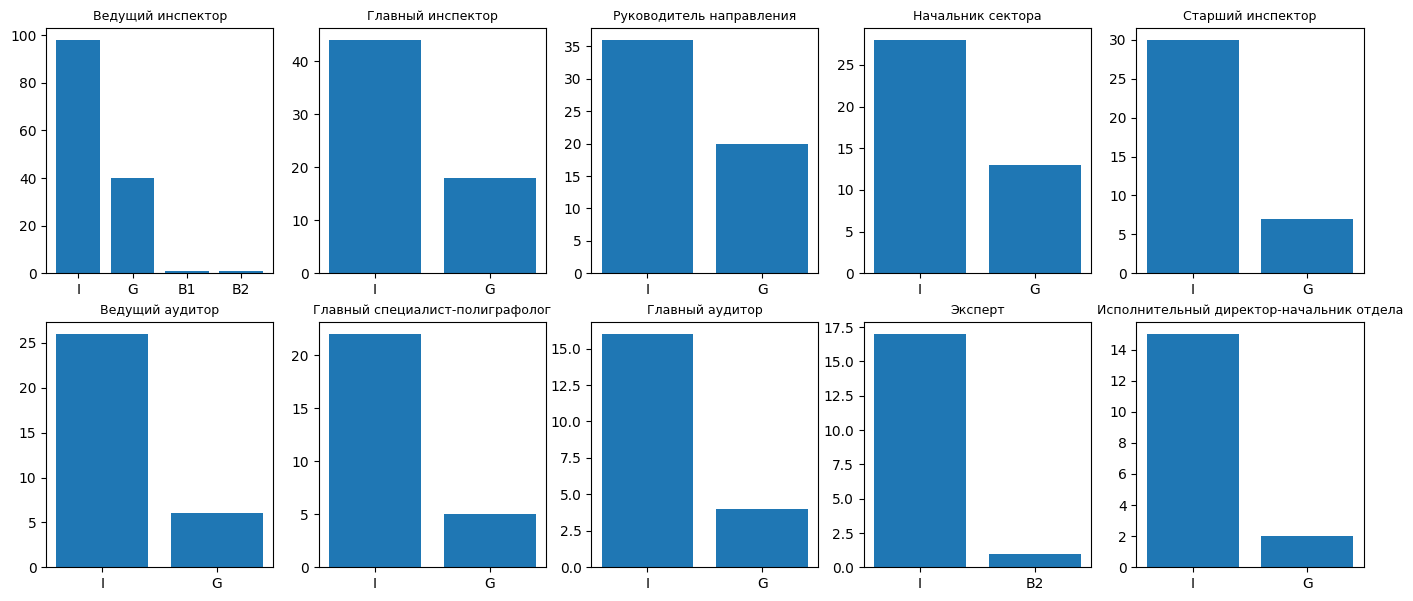

Блок HR


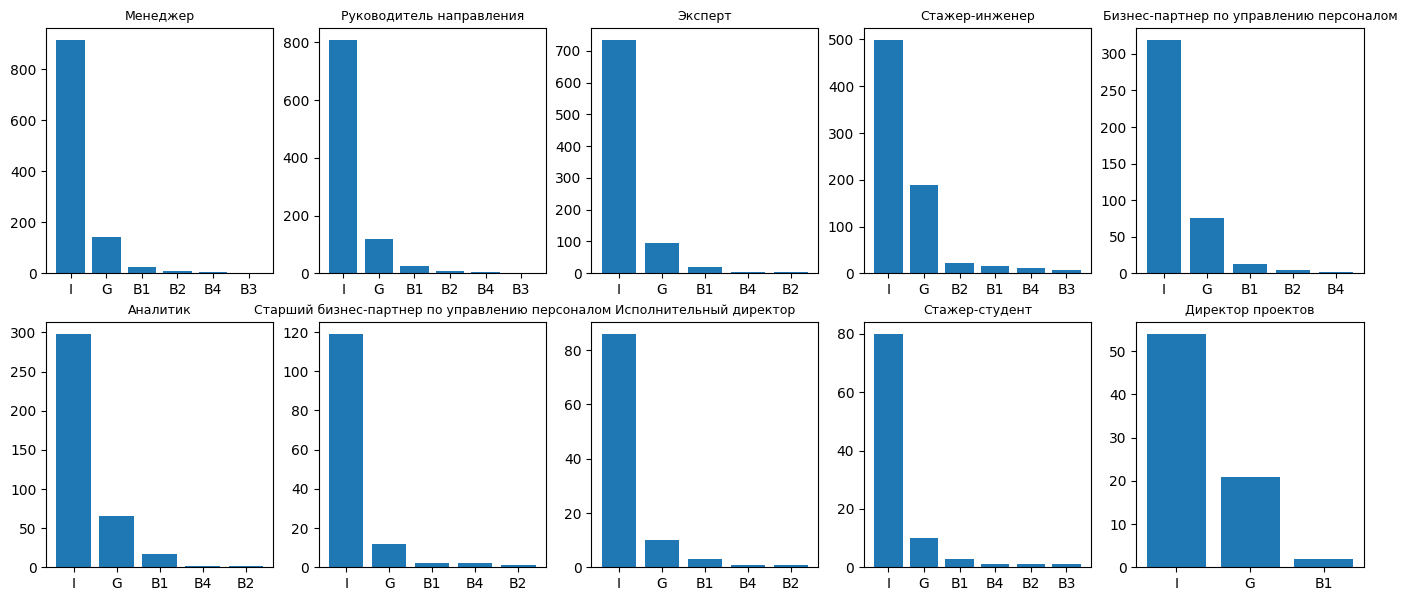

Блок Корпоративно-инвестиционный


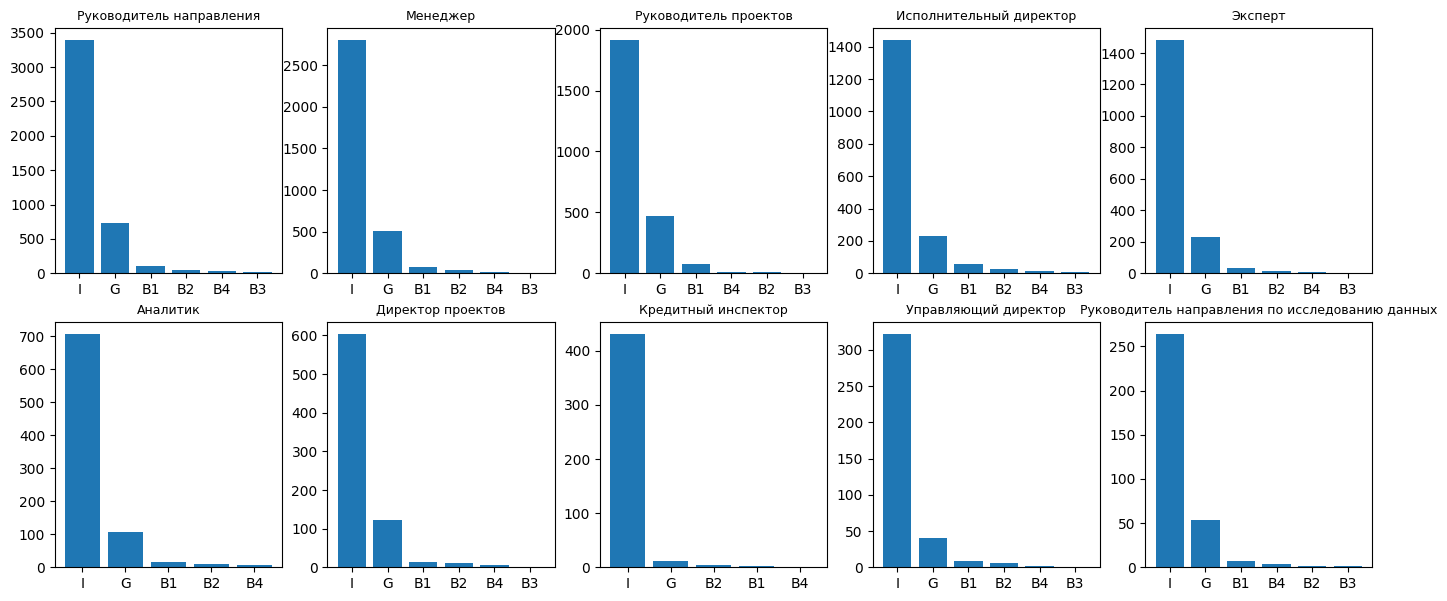

Подразделения вне


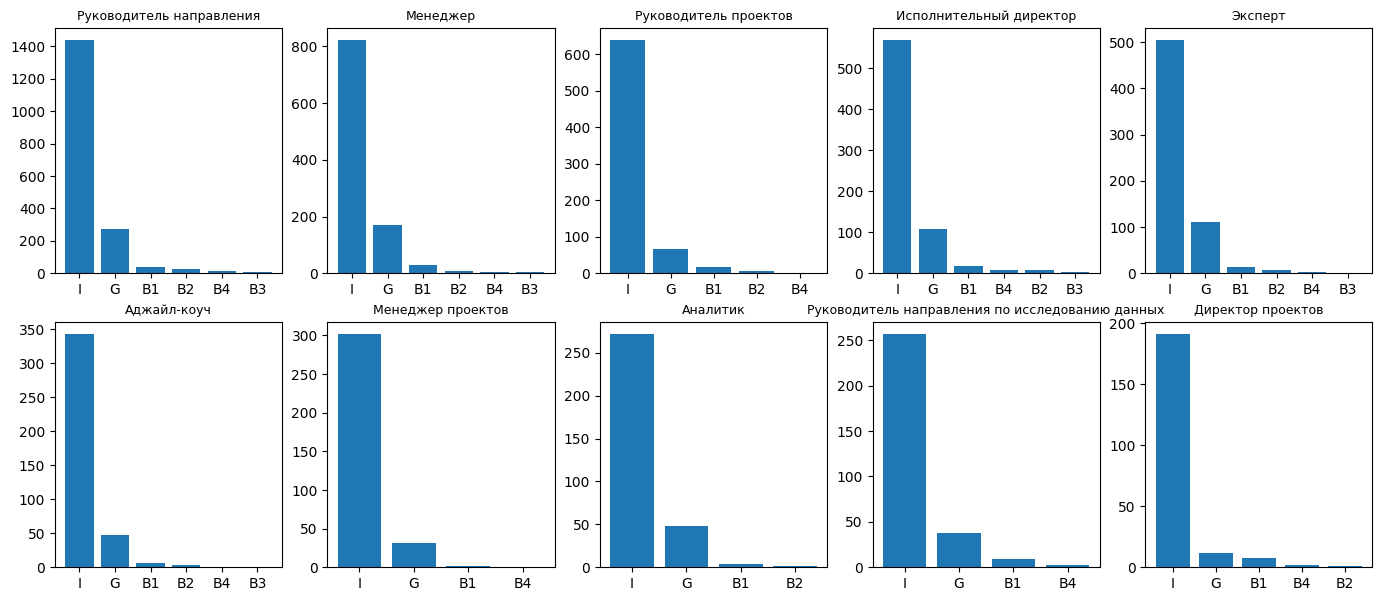

Блок Сервисы


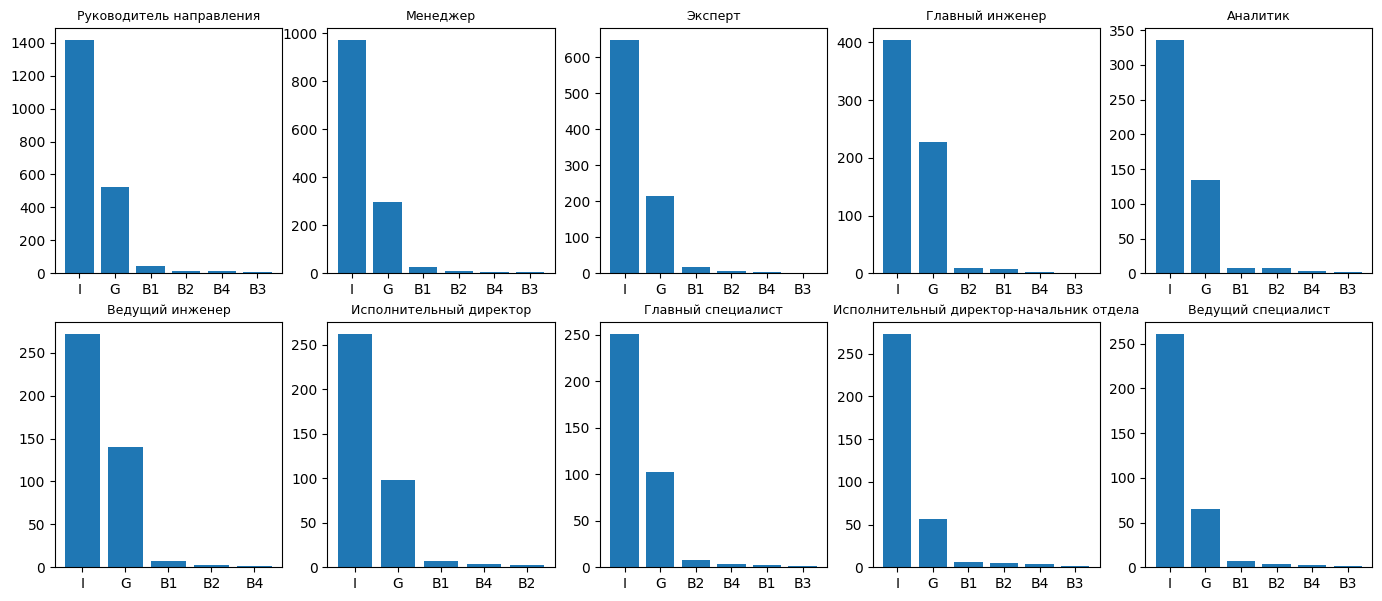

Блок GR,


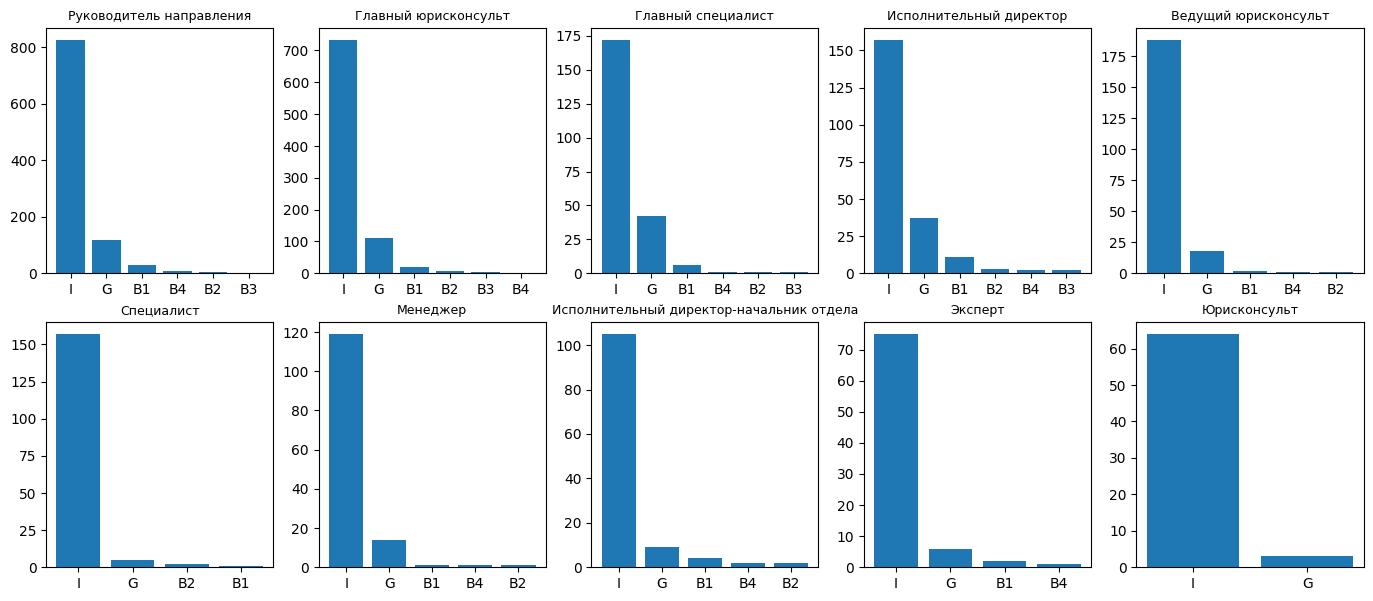

Блок Финансы


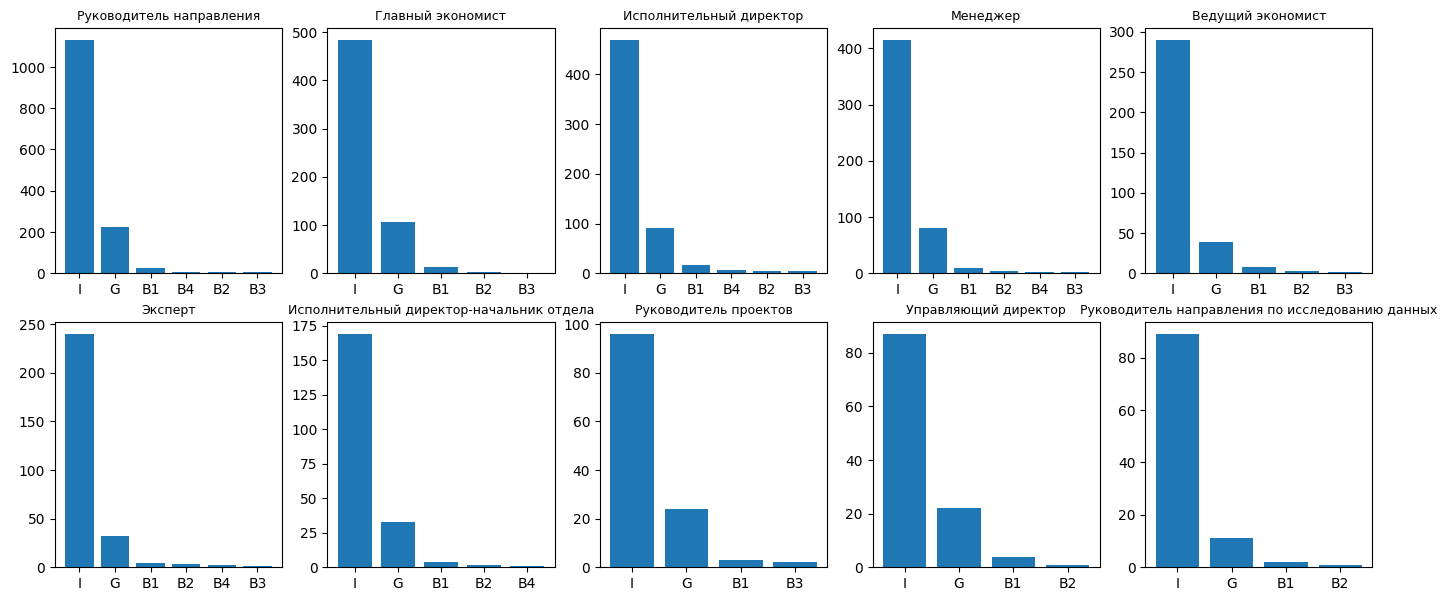

Блок Стратегия


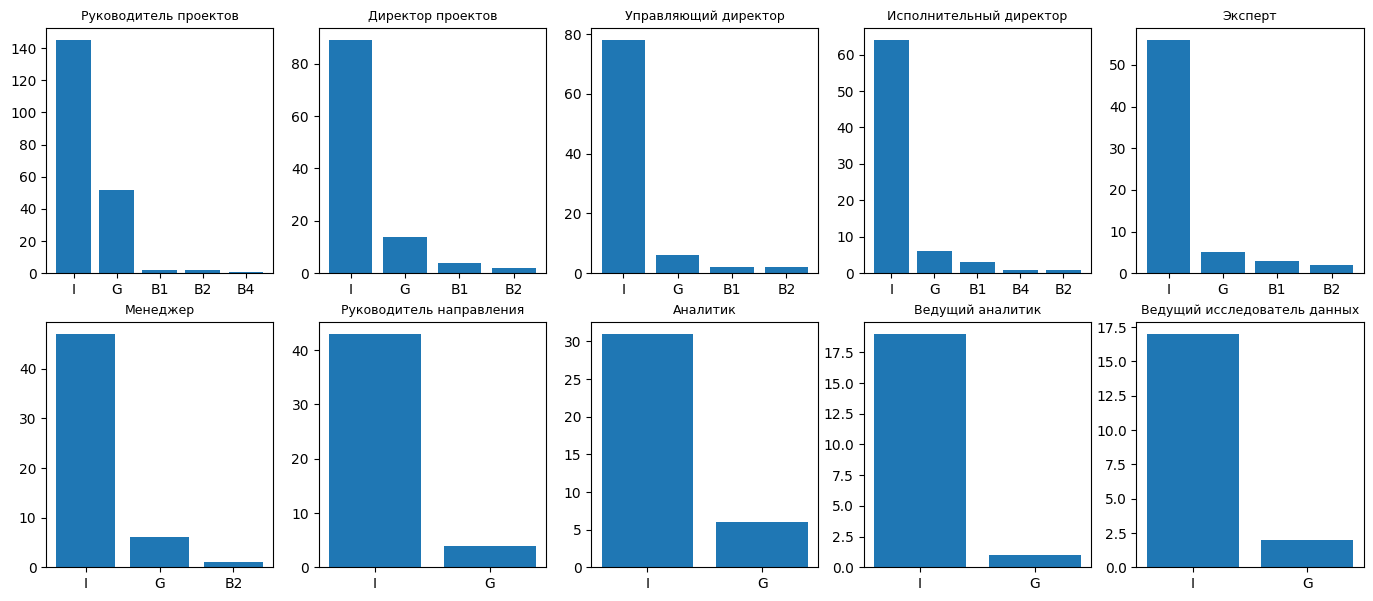

Блок Транзакционный


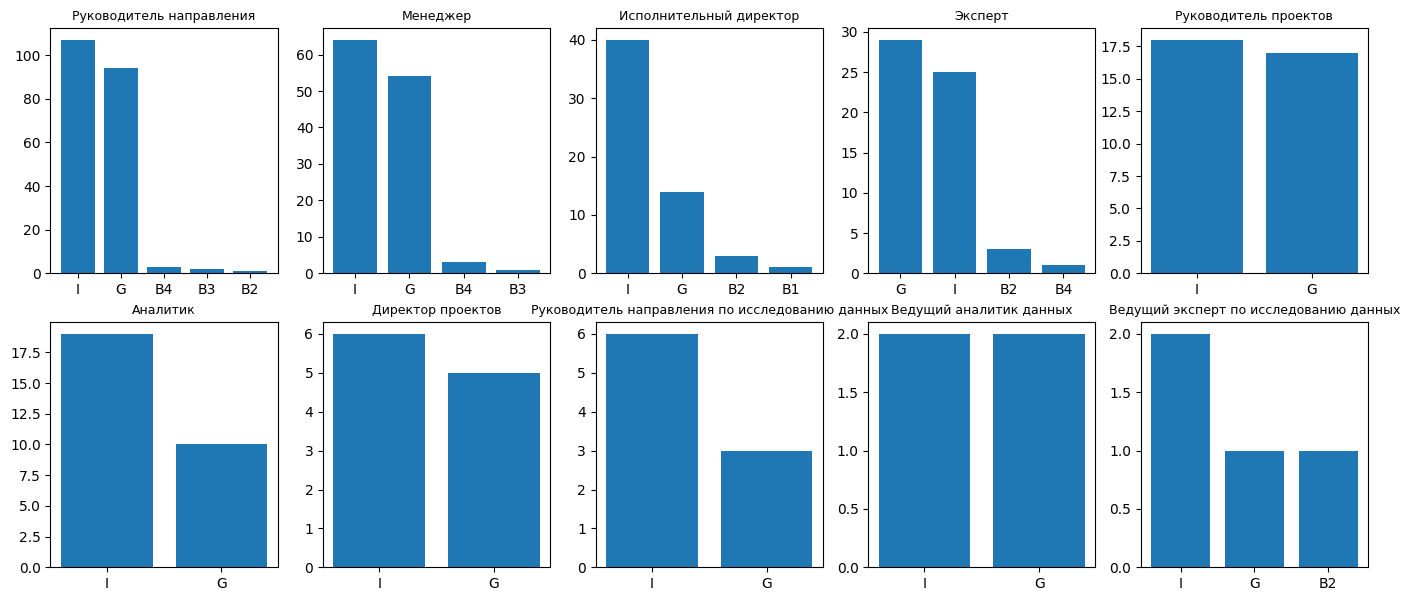

Блок Розничный


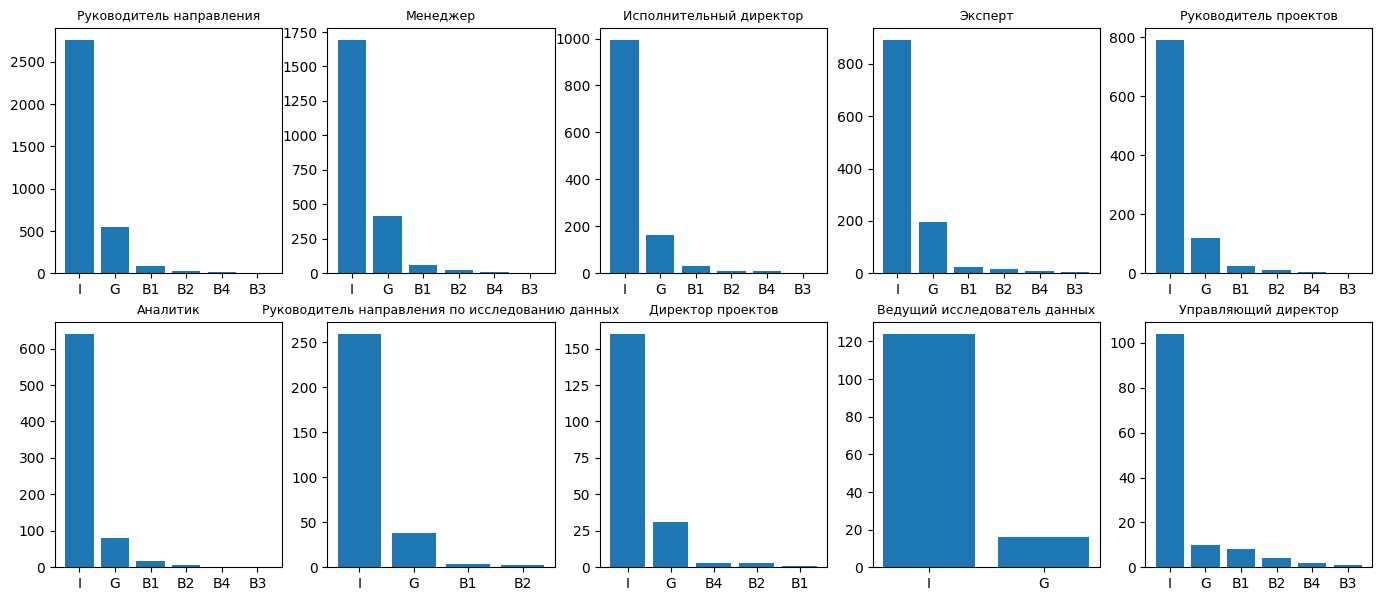

Блок Сеть


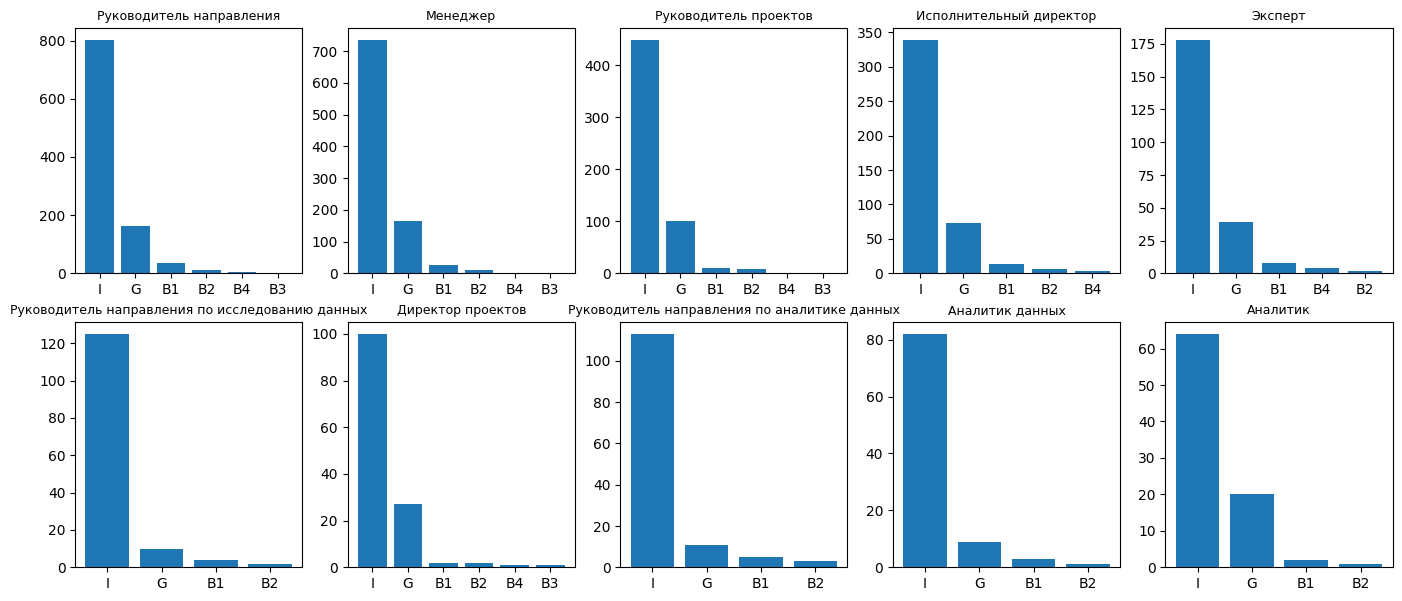

Блок Управление


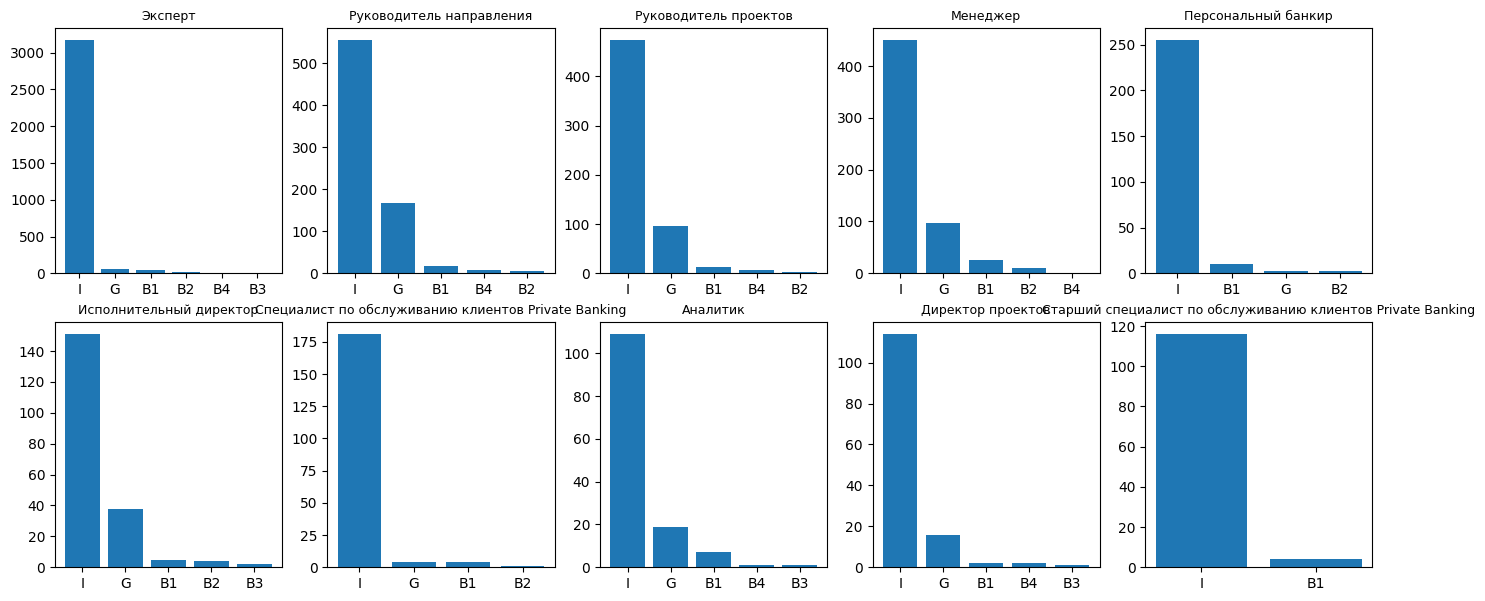

Другие подразделения


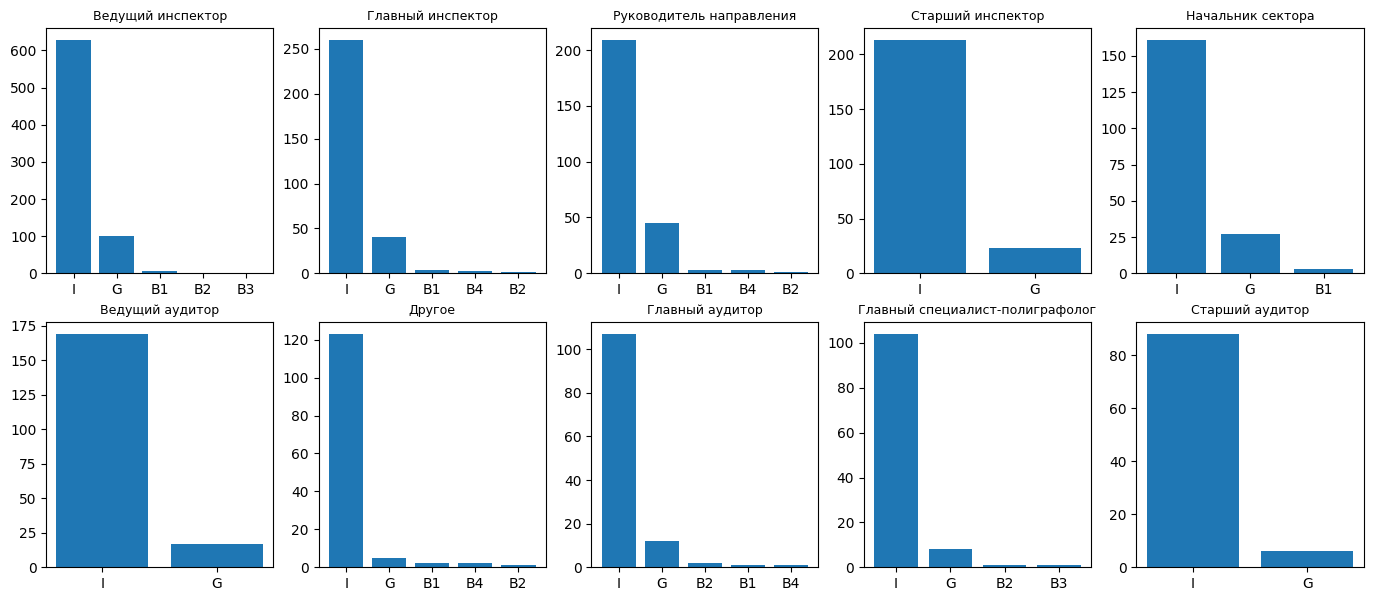

Блок Развитие


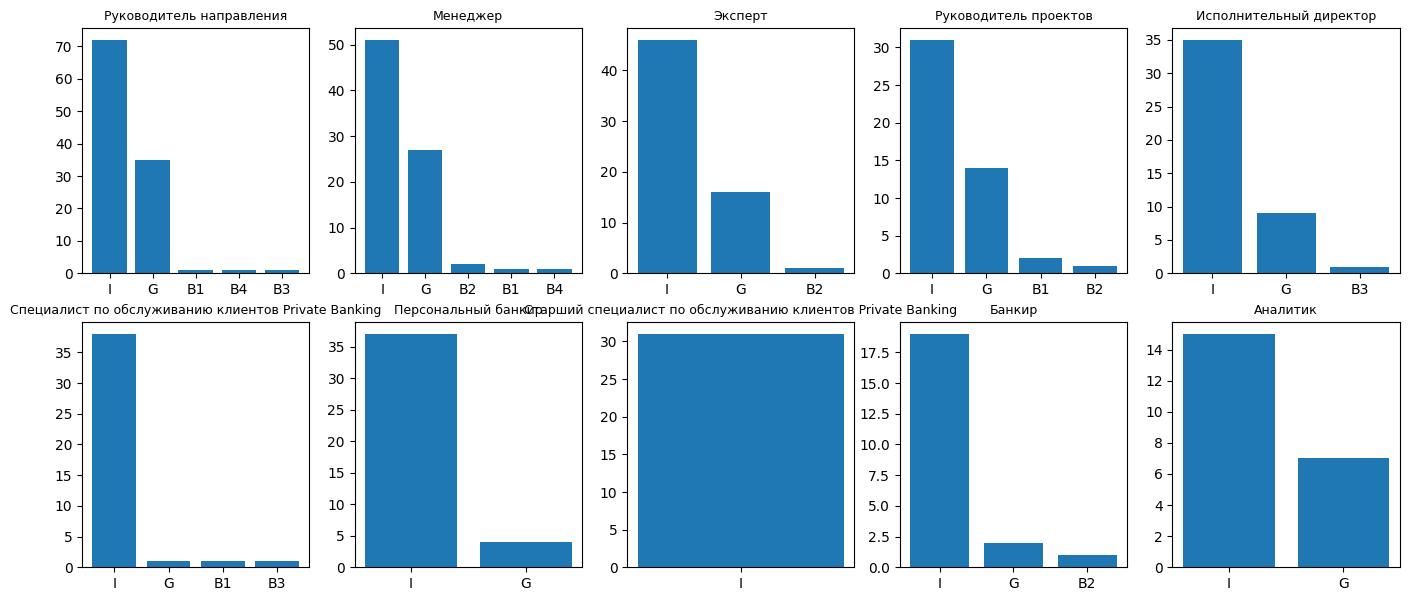

Блок Sberbank


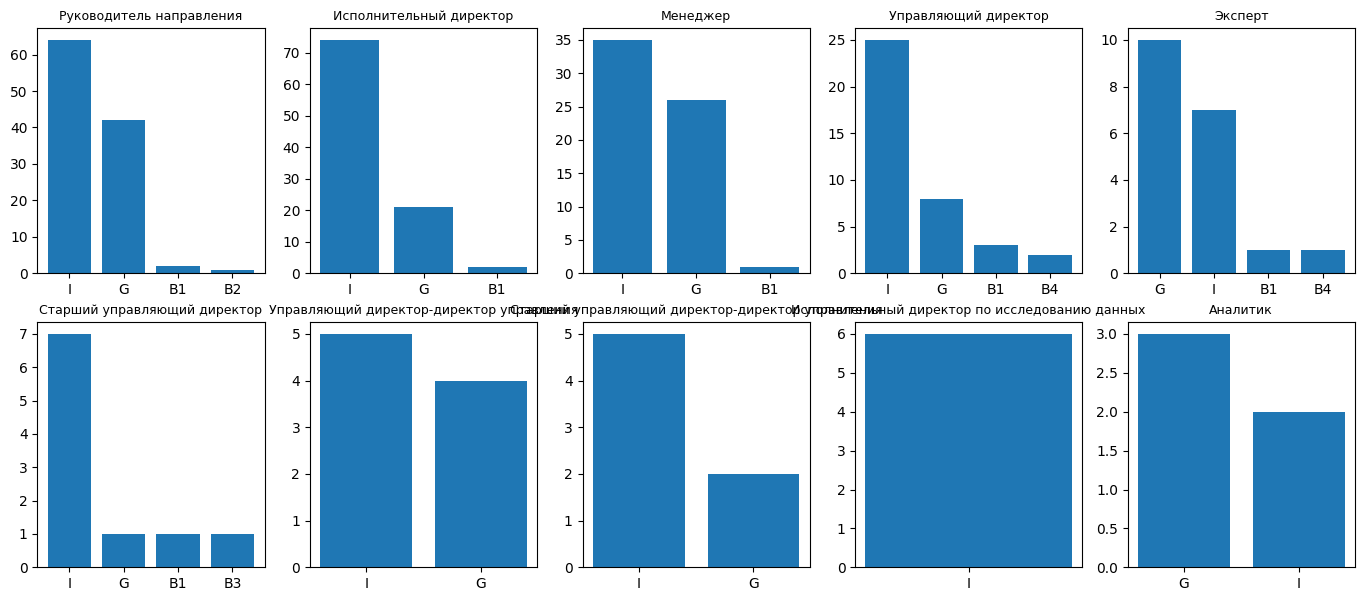

Старая структура


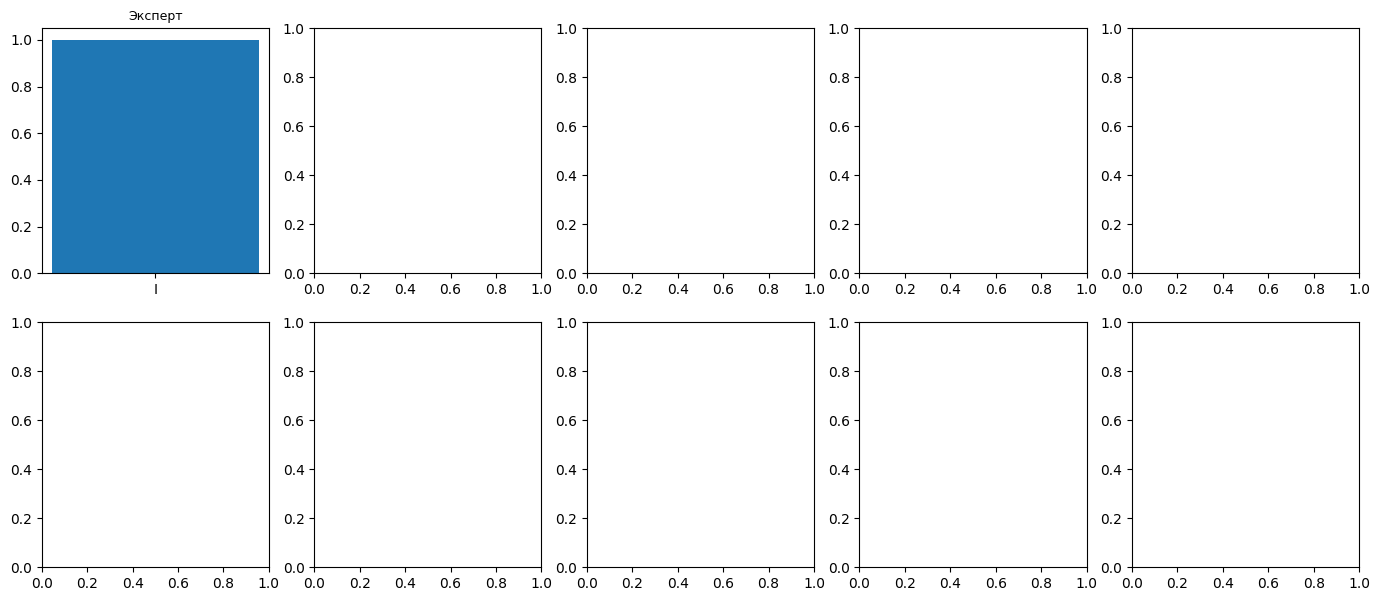

In [94]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [95]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [96]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

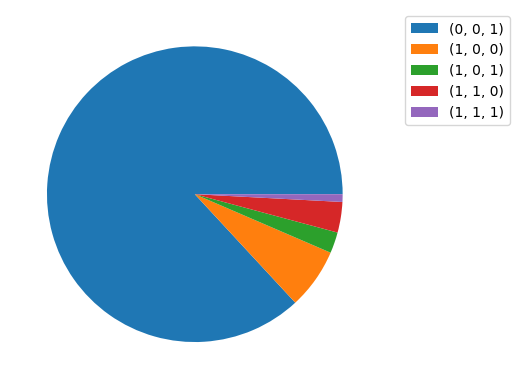

In [97]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


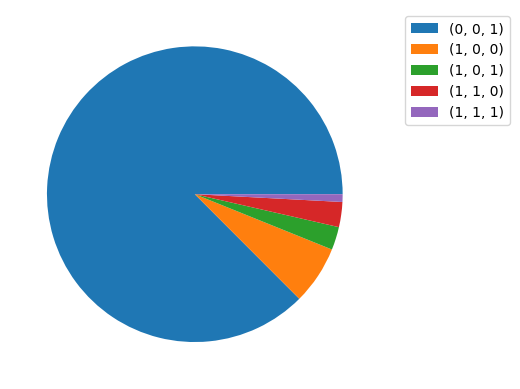

Главный инженер по разработке


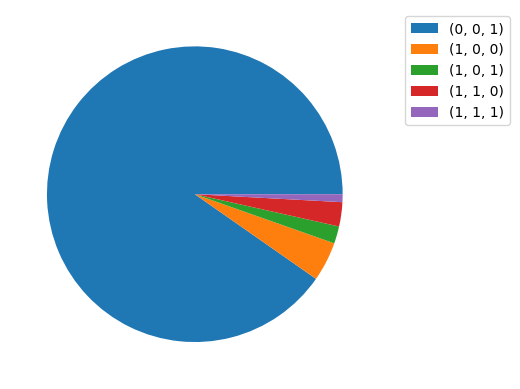

Ведущий инженер по разработке


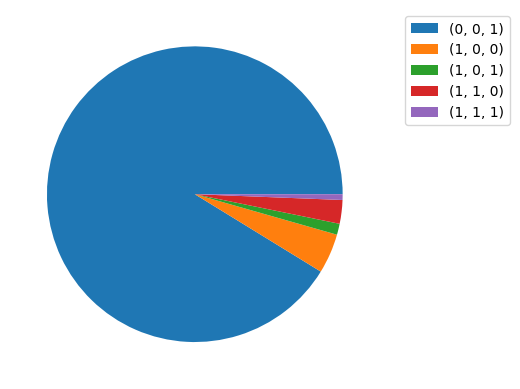

Эксперт


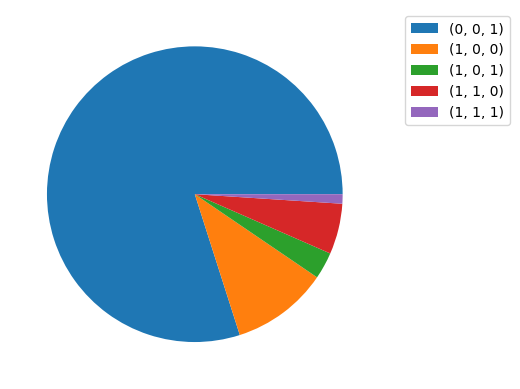

Менеджер


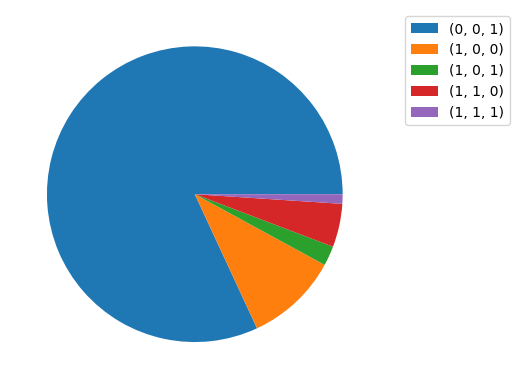

Исполнительный директор


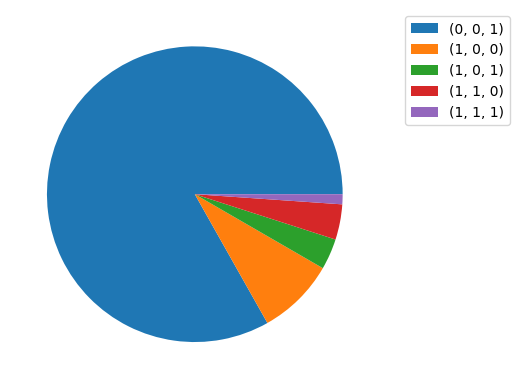

Старший инженер по разработке


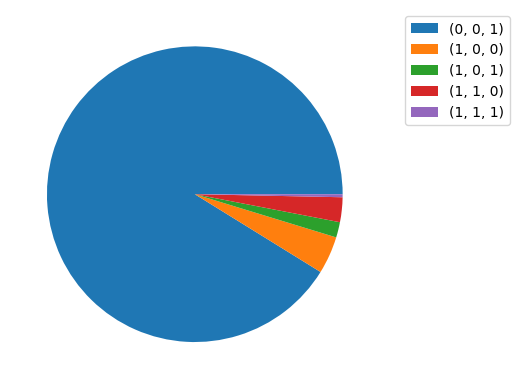

Руководитель проектов


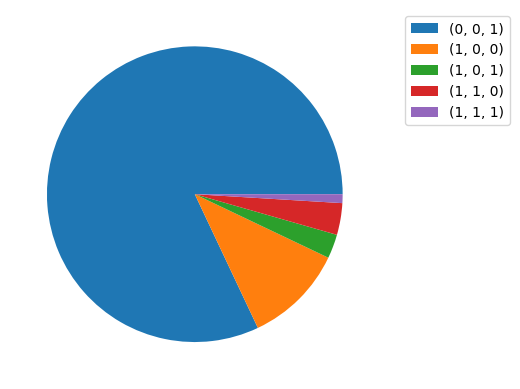

Ведущий инженер по сопровождению


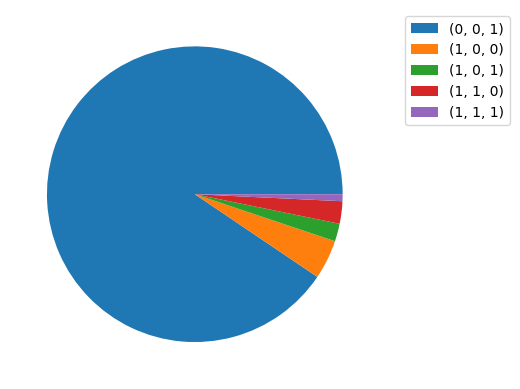

Ведущий инженер


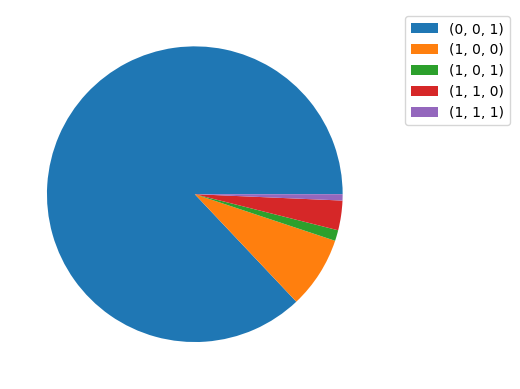

In [98]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


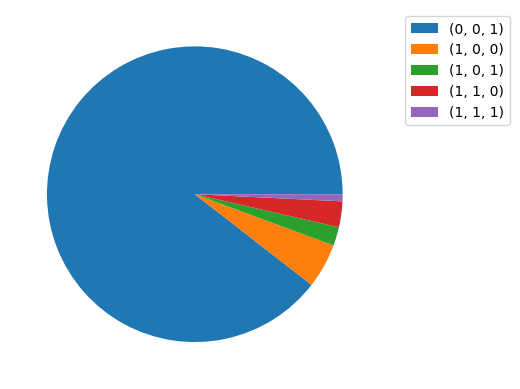

Блок Корпоративно-инвестиционный


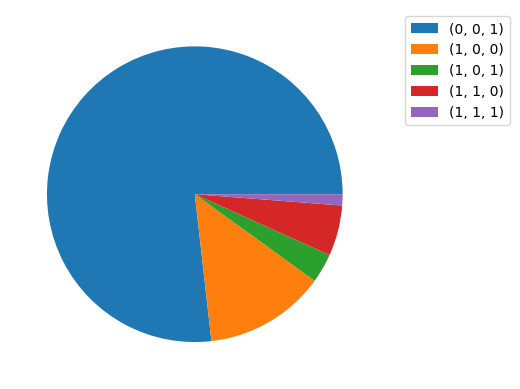

Блок Сервисы


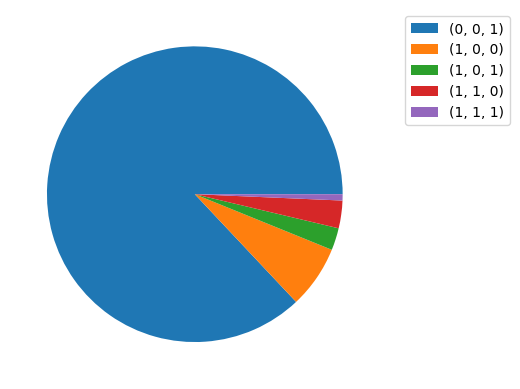

Блок Розничный


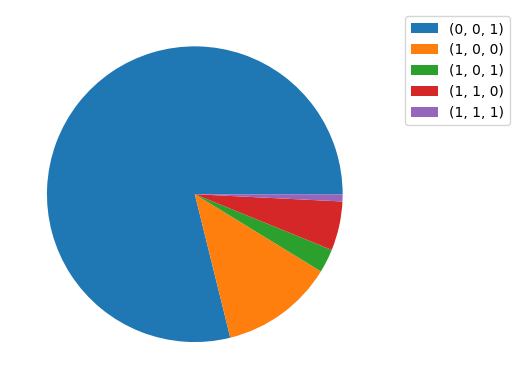

Подразделения вне


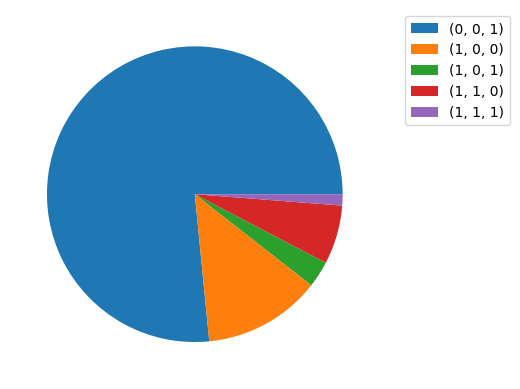

Блок Управление


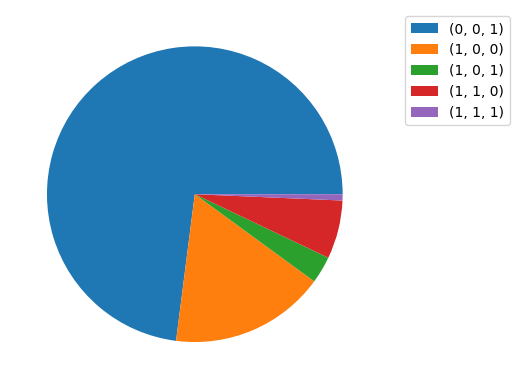

Блок HR


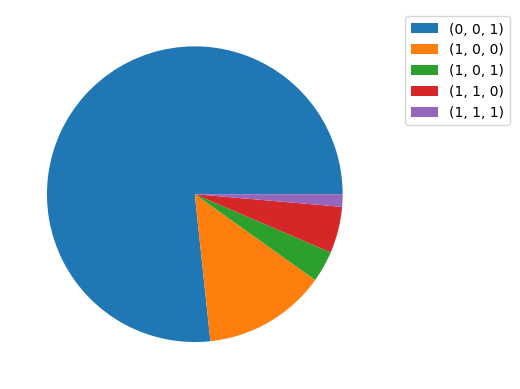

Блок Финансы


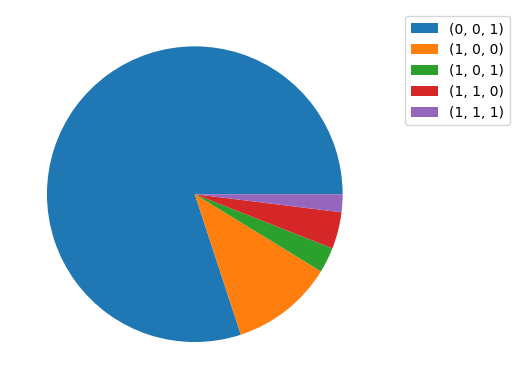

Блок Риски


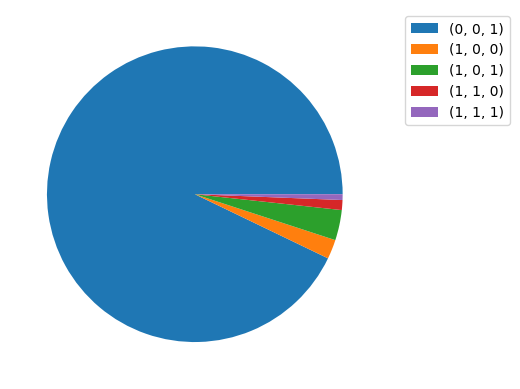

Блок Сеть


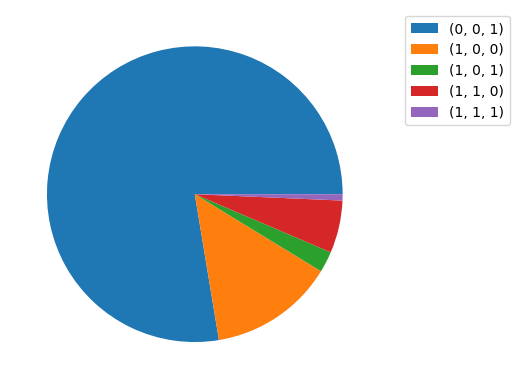

In [99]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [100]:
temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43073,Руководитель направления,Блок Технологии,"(0, 0, 0)"
43074,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [101]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [102]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [103]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.73
Вероятность для Главный инженер по разработке - 0.71
Вероятность для Эксперт - 0.83
Вероятность для Ведущий инженер по разработке - 0.72
Вероятность для Менеджер - 0.78
Вероятность для Исполнительный директор - 0.74
Вероятность для Старший инженер по разработке - 0.70
Вероятность для Руководитель проектов - 0.78
Вероятность для Ведущий инженер по сопровождению - 0.78
Вероятность для Ведущий инженер - 0.80
(0, 0, 1)
Вероятность для Руководитель направления - 0.24
Вероятность для Главный инженер по разработке - 0.26
Вероятность для Ведущий инженер по разработке - 0.26
Вероятность для Исполнительный директор - 0.21
Вероятность для Старший инженер по разработке - 0.27
Вероятность для Менеджер - 0.18
Вероятность для Эксперт - 0.13
Вероятность для Руководитель проектов - 0.18
Вероятность для Ведущий инженер по сопровождению - 0.20
Вероятность для Ведущий инженер - 0.17
(1, 0, 0)
Вероятность для Руководитель направления - 0.02
Вероятно

In [104]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [105]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]}")
    except StatisticsError:
        pass




(0, 0, 0)


Средний показатель - 0.85

Вероятность для Начальник смены-старший охранник - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Менеджер по продажам - 1.0
Вероятность для Отраслевой кредитный менеджер - 1.0
Вероятность для Менеджер по работе с ключевыми партнерами - 1.0
Вероятность для Ведущий специалист по продажам - 1.0
Вероятность для Исполнительный директор-старший сейлз - 1.0
Вероятность для Другая - 1.0
Вероятность для Оператор-стенографист - 1.0
Вероятность для Исполнительный директор-начальник сектора - 1.0
Вероятность для Секретарь Исполнительного вице-президента, руководителя блока "Технологии" - 1.0
Вероятность для Охранник (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.0
Вероятность для Младший cейлз-трейдер - 1.0
Вероятность для Главный специалист КИПиА - 1.0
Вероятность для Главный специалист по продажам - 1.0
Вероятность для Старший сейлз-региональный менеджер - 1.0
Вероятность для Ведущий трейдер - 1.0
Вероятность для Вице-президент-директ


Средний показатель - 0.03

Вероятность для Директор по операционному маркетингу - 1.0
Вероятность для Директор по организации внедрения стандартов по продажам на территории - 1.0
Вероятность для Младший редактор-переводчик - 1.0
Вероятность для Старший управляющий директор-финансовый омбудсмен - 0.67
Вероятность для Старший управляющий директор-директор лаборатории - 0.5
Вероятность для Советник старшего вице-президента-руководителя блока "Sberbank International" - 0.25
Вероятность для Заместитель директора департамента - 0.25
Вероятность для Старший водитель автомобиля, предназначенного для перевозки ценностей и корреспонденции - 0.21
Вероятность для Территориальный менеджер по безопасности - 0.2
Вероятность для Вице-президент - 0.2
Вероятность для Старший управляющий директор, начальник секретариата-референт Президента Сбербанка России - 0.2
Вероятность для Ведущий методолог - 0.2
Вероятность для Руководитель направления по взаимодействию с регуляторами - 0.2
Вероятность для Помощни


Средний показатель - 0.01

Вероятность для Руководитель направления процессов - 0.2
Вероятность для Управляющий директор-руководитель службы - 0.17
Вероятность для Слесарь-ремонтник - 0.17
Вероятность для Исполнительный директор-руководитель Пресс-службы - 0.17
Вероятность для Директор управления - 0.17
Вероятность для Руководитель корпоративного TV - 0.17
Вероятность для Главный электромеханик - 0.17
Вероятность для Редактор - 0.08
Вероятность для Директор по продуктам - 0.06
Вероятность для Советник Президента - 0.05
Вероятность для Советник первого заместителя Председателя Правления - 0.05
Вероятность для Директор - 0.04
Вероятность для Менеджер по крупнейшим клиентам - 0.04
Вероятность для Управляющий директор по исследованию данных-начальник центра - 0.04
Вероятность для Ведущий аудитор-аналитик данных - 0.04
Вероятность для Исполнительный директор-старший трейдер - 0.04
Вероятность для Медиатор - 0.04
Вероятность для Директор по развитию - 0.04
Вероятность для Стажер-инженер - 0

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [106]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [107]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [108]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Старший водитель автомобиля, предназначенного для перевозки ценностей и корреспонденции: 0.21
Вице-президент-директор департамента: 0.07
Управляющий директор-начальник отдела: 0.05
Старший руководитель проектов: 0.05
Управляющий директор-директор управления: 0.05
Консультант: 0.04
Управляющий директор: 0.03
Персональный банкир: 0.03
Бизнес-партнер по управлению персоналом: 0.03
Управляющий директор-начальник управления: 0.03


(1, 1, 0)
Стажер-инженер: 0.03
Ведущий дизайнер: 0.03
Исполнительный директор-начальник управления: 0.02
Управляющий директор: 0.02
Стажер: 0.02
Аналитик данных: 0.02
Исполнительный директор-начальник отдела: 0.01
Управляющий директор-начальник управления: 0.01
Старший специалист: 0.01
Директор проектов: 0.01


(1, 0, 1)
Исполнительный директор-начальник управления: 0.02
Стажер-инженер: 0.01
Управляющий директор-начальник управления: 0.01
Ведущий эксперт по технологиям: 0.01
Главный эксперт по технологиям: 0.01
Исполнительный директор по исследованию да

Рассмотрение хорошего исхода

In [109]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Исполнительный директор по направлению Внутренний контроль процессов обработки и защиты ПДн: 1.00
Исполнительный директор по валидации-начальник центра: 0.83
Руководитель направления по кибербезопасности: 0.83
Управляющий директор по валидации-начальник центра: 0.71
Ведущий архитектор: 0.62
Директор проектов по защите данных: 0.60
Старший эксперт по защите данных: 0.60
Бизнес-партнер по кибербезопасности: 0.57
Исполнительный директор по направлению Экспертиза обработки и защиты ПДн: 0.56
Старший аудитор по кибербезопасности: 0.55


Рассмотрение варианта с игнорированием

In [110]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Начальник смены-старший охранник: 1.00
Уборщик: 1.00
Менеджер по продажам: 1.00
Отраслевой кредитный менеджер: 1.00
Менеджер по работе с ключевыми партнерами: 1.00
Ведущий специалист по продажам: 1.00
Исполнительный директор-старший сейлз: 1.00
Другая: 1.00
Оператор-стенографист: 1.00
Исполнительный директор-начальник сектора: 1.00


Оценка наиболее уязвимых к фишингу блоков

In [111]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [112]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Блок Сеть: 0.03
Блок Sberbank: 0.03
Блок GR,: 0.03
Блок HR: 0.03
Блок Корпоративно-инвестиционный: 0.02
Блок Розничный: 0.02
Подразделения вне: 0.02
Блок Управление: 0.02
Блок Финансы: 0.02
Блок Сервисы: 0.02
Блок Стратегия: 0.02
Блок Технологии: 0.01
Другие подразделения: 0.01
Блок Развитие: 0.01
Блок Риски: 0.01
Прямое подчинение: 0.01
Блок Транзакционный: 0.00


(1, 1, 0)
Блок Стратегия: 0.02
Блок Транзакционный: 0.01
Блок Сеть: 0.01
Подразделения вне: 0.01
Блок Розничный: 0.01
Прямое подчинение: 0.01
Блок Корпоративно-инвестиционный: 0.01
Блок HR: 0.01
Блок Развитие: 0.01
Блок Сервисы: 0.01
Блок Управление: 0.01
Блок Финансы: 0.01
Блок GR,: 0.01
Блок Технологии: 0.01
Другие подразделения: 0.01
Блок Риски: 0.00
Блок Sberbank: 0.00


(1, 0, 1)
Блок Транзакционный: 0.01
Блок Риски: 0.01
Блок Sberbank: 0.01
Блок Сервисы: 0.01
Блок HR: 0.01
Блок GR,: 0.01
Блок Корпоративно-инвестиционный: 0.01
Блок Технологии: 0.01
Блок Финансы: 0.01
Подразделения вне: 0.01
Блок Розничный: 0.0

Рассмотрение хорошего исхода

In [113]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Транзакционный: 0.42
Блок Риски: 0.33
Блок Sberbank: 0.31
Прямое подчинение: 0.26
Блок Сервисы: 0.24
Блок Технологии: 0.24
Блок Развитие: 0.22
Блок Сеть: 0.16
Блок Финансы: 0.15
Блок Розничный: 0.15
Блок HR: 0.15
Блок Корпоративно-инвестиционный: 0.14
Блок Стратегия: 0.14
Подразделения вне: 0.14
Другие подразделения: 0.12
Блок GR,: 0.11
Блок Управление: 0.09


Рассмотрение варианта с игнорированием

In [114]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Старая структура: 1.00
Блок Управление: 0.87
Другие подразделения: 0.85
Блок GR,: 0.84
Блок Стратегия: 0.83
Подразделения вне: 0.82
Блок Корпоративно-инвестиционный: 0.82
Блок Финансы: 0.81
Блок Розничный: 0.81
Блок HR: 0.80
Блок Сеть: 0.80
Блок Развитие: 0.75
Блок Технологии: 0.73
Блок Сервисы: 0.72
Прямое подчинение: 0.72
Блок Sberbank: 0.65
Блок Риски: 0.65
Блок Транзакционный: 0.54


Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [115]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [116]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; Главный инженер по разработке; Эксперт; Ведущий инженер по разработке; Менеджер; Исполнительный директор; Старший инженер по разработке; Руководитель проектов; Ведущий инженер по сопровождению; Ведущий инженер; Главный инженер; Аналитик; Инженер по разработке; Главный инженер по сопровождению; Старший инженер; Старший эксперт по технологиям; Старший инженер по сопровождению; Ведущий эксперт по технологиям; Директор проектов; Руководитель направления по исследованию данных; Управляющий директор; Ведущий аналитик; Стажер; Исполнительный директор-начальник отдела; Ведущий эксперт; Главный аналитик; Главный эксперт; Главный специалист; Старший аналитик; Ведущий инспектор; Инженер по сопровождению; Главный юрисконсульт; Управляющий директор-начальник управления; Ведущий специалист; Инженер; Руководитель направления по аналитике данных; Старший эксперт; Ведущий исследователь данных; Исследователь данных; Испо

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; 


Наименее подвержены

Менеджер; Исполнительный директор; Эксперт; Ведущий инженер по разработке; Руководитель проектов; Старший инженер по разработке; Аналитик; Ведущий инженер; Главный инженер; Управляющий директор; Инженер по разработке; Ведущий инженер по сопровождению; Директор проектов; Главный инженер по сопровождению; Старший инженер; Старший эксперт по технологиям; Стажер; Исполнительный директор-начальник отдела; Управляющий директор-начальник управления; Ведущий эксперт по технологиям; Руководитель направления по исследованию данных; Ведущий аналитик; Старший инженер по сопровождению; Главный юрисконсульт; Главный эксперт; Ведущий эксперт; Старший аналитик; Стажер-инженер; Главный экономист; Старший эксперт; Исследователь данных; Главный специалист; Бизнес-партнер по управлению персоналом; Главный аналитик; Инженер; Ведущий исследователь данных; Исполн

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; 


Наименее подвержены

Эксперт; Менеджер; Исполнительный директор; Ведущий инженер по разработке; Старший инженер по разработке; Руководитель проектов; Аналитик; Главный инженер; Управляющий директор; Ведущий инженер; Инженер по разработке; Ведущий инженер по сопровождению; Директор проектов; Старший эксперт по технологиям; Стажер; Старший инженер; Стажер-инженер; Исполнительный директор-начальник отдела; Старший инженер по сопровождению; Главный инженер по сопровождению; Ведущий эксперт по технологиям; Руководитель направления по исследованию данных; Ведущий дизайнер; Управляющий директор-начальник управления; Ведущий аналитик; Главный специалист; Старший аналитик; Главный аналитик; Аналитик данных; Исполнительный директор-начальник управления; Руководитель направления по аналитике данных; Ведущий эксперт; Исследователь данных; Исполнительный директор по исследо

Разделение на управляющий и рядовой состав

In [117]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [118]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [119]:
len(lead_workers)

286

In [120]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [121]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [122]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [123]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [124]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.741
1,"(0, 0, 1)",0.227
2,"(1, 0, 0)",0.016
3,"(1, 1, 0)",0.008
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.002


In [125]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [126]:
len(simple_workers)

178

In [127]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [128]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [129]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [130]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [131]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.793
1,"(0, 0, 1)",0.175
2,"(1, 0, 0)",0.017
3,"(1, 1, 0)",0.009
4,"(1, 0, 1)",0.005
5,"(1, 1, 1)",0.002


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [132]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [133]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 0.83

Вероятность для Начальник смены-старший охранник - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Исполнительный директор-старший сейлз - 1.00
Вероятность для Исполнительный директор-начальник сектора - 1.00
Вероятность для Главный специалист КИПиА - 1.00
Вероятность для Главный специалист по продажам - 1.00
Вероятность для Ведущий трейдер - 1.00
Вероятность для Вице-президент-директор центра - 1.00
Вероятность для Главный механик - 1.00
Вероятность для Ведущий инженер КИПиА - 1.00
Вероятность для Руководитель группы специалистов - 1.00
Вероятность для Директор по организации продаж - 1.00
Вероятность для Исполнительный директор-территориальный менеджер - 1.00
Вероятность для Директор по работе с федеральными проектами - 1.00
Вероятность для Управляющий директор-заместитель начальника управления - 1.00
Вероятность для Управляющий директор-заместитель начальника секретариата - 1.00
Вероятность для Старший вице-президент

In [134]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [135]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 0.89

Вероятность для Уборщик - 1.00
Вероятность для Менеджер по продажам - 1.00
Вероятность для Отраслевой кредитный менеджер - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Другая - 1.00
Вероятность для Оператор-стенографист - 1.00
Вероятность для Секретарь Исполнительного вице-президента, руководителя блока "Технологии" - 1.00
Вероятность для Охранник (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.00
Вероятность для Младший cейлз-трейдер - 1.00
Вероятность для Старший сейлз-региональный менеджер - 1.00
Вероятность для Младший сейлз-региональный менеджер - 1.00
Вероятность для Аудитор-младший исследователь данных - 1.00
Вероятность для Специалист по операционной поддержке - 1.00
Вероятность для Ассистент трейдинга - 1.00
Вероятность для Эксперт по графическому дизайну - 1.00
Вероятность для Помощник Президента - 1.00
Вероятность для Сейлз-региональный менеджер - 1.00
Вероятность для Старший разр

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [136]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
43076,Инженер по разработке,Блок Технологии,"(0, 0, 0)"
43077,Аналитик,Подразделения вне,"(0, 0, 0)"
43078,Эксперт,Блок Стратегия,"(0, 0, 0)"
43079,Ведущий инженер по разработке,Блок Технологии,"(0, 0, 0)"


In [137]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [138]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",184085
1,"(0, 0, 1)",51479
2,"(1, 0, 0)",3931
3,"(1, 1, 0)",1979
4,"(1, 0, 1)",1359
5,"(1, 1, 1)",497


In [139]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [140]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [141]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.757
1,"(0, 0, 1)",0.212
2,"(1, 0, 0)",0.016
3,"(1, 1, 0)",0.008
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.002


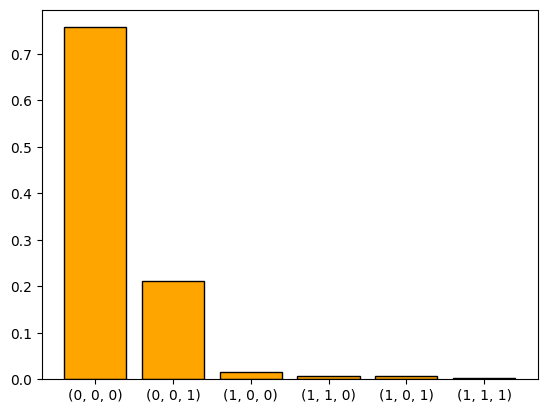

In [142]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()